# Problem 1: Logistic Regression

In [1]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # order randomly rather than by class label
X,_ = ml.transforms.rescale(X) # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2] # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0] # Dataset B: class 1 vs class 2

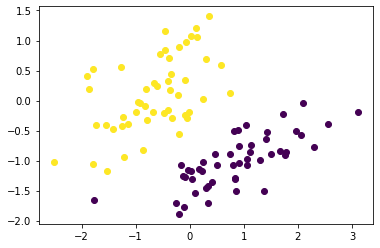

In [3]:
ml.plotClassify2D(None, XA,YA)
plt.show()

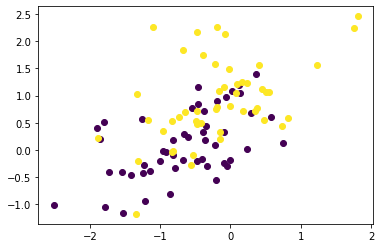

In [4]:
ml.plotClassify2D(None, XB, YB)
plt.show()

Dataset A is linearly separable

### 1.2

In [5]:
import logisticClassify2 as lc2

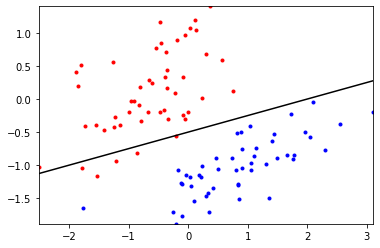

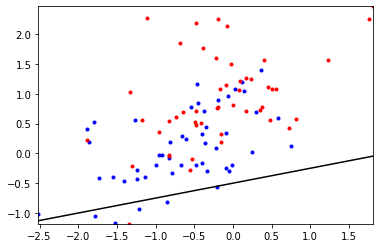

In [6]:
learnerA = lc2.logisticClassify2()
learnerA.classes = np.unique(YA)
learnerA.theta = np.array( [0.5,-0.25,1] )
lc2.logisticClassify2.plotBoundary(learnerA,XA,YA)
plt.show()

learnerB = lc2.logisticClassify2()
learnerB.classes = np.unique(YB)
learnerB.theta = np.array( [0.5,-0.25,1] )
lc2.logisticClassify2.plotBoundary(learnerB,XB,YB)
plt.show()

### 1.3

In [7]:
learnerA = lc2.logisticClassify2()
learnerA.classes = np.unique(YA)
learnerA.theta = np.array( [0.5,-0.25,1] )
learnerA.err(XA,YA)

0.050505050505050504

In [8]:
learnerB = lc2.logisticClassify2()
learnerB.classes = np.unique(YB)
learnerB.theta = np.array( [0.5,-0.25,1] )
learnerB.err(XB,YB)

0.46464646464646464

### 1.4

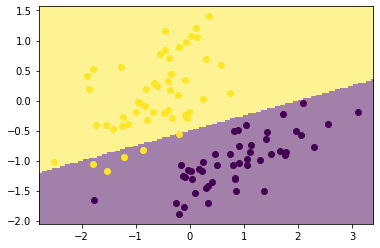

In [9]:
ml.plotClassify2D(learnerA, XA, YA)
plt.show()

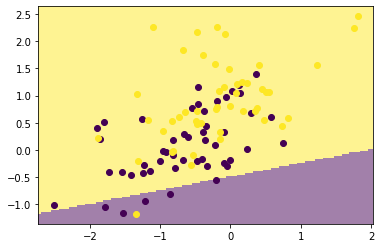

In [10]:
ml.plotClassify2D(learnerB, XB, YB)
plt.show()

### 1.5

$$J_j(\theta) = -
 \begin{cases} 
      \text{log}(\sigma(x^{(i)} \cdot \theta)) & \text{if } y^{(i)} = 1 \\
      \text{log}(1 - \sigma(x^{(i)} \cdot \theta)) & \text {if } y^{(i)} = 0
   \end{cases}$$
$$\nabla J_j(\theta) = -
 \begin{cases} 
      (1 - \sigma(x^{(i)} \cdot \theta))x^{(i)} & \text{if } y^{(i)} = 1 \\
      - \sigma(x^{(i)} \cdot \theta))x^{(i)} & \text {if } y^{(i)} = 0
   \end{cases}$$

### 1.6

### 1.7

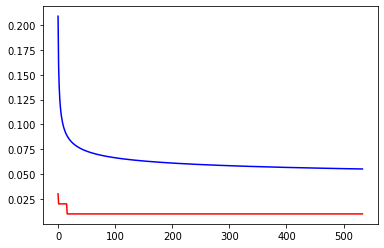

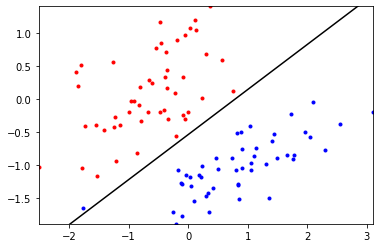

Training error rate:  0.010101010101010102


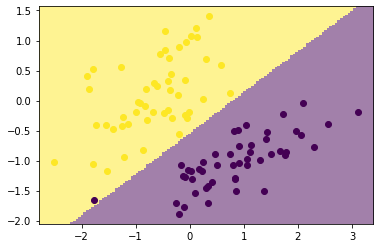

In [11]:
learnerA = lc2.logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5)
plt.show()
ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate: ",learnerA.err(XA,YA))
plt.show()

Training error rate:  0.25252525252525254


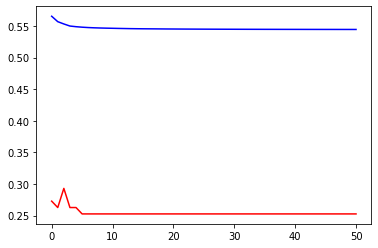

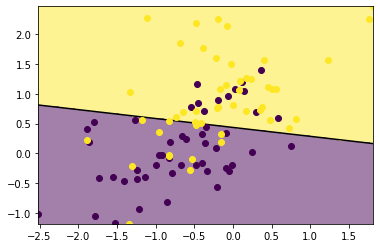

In [13]:
learnerB=lc2.logisticClassify2()
learnerB.theta=np.array([0.,0.,0.]);
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);
ml.plotClassify2D(learnerB,XB,YB)
print("Training error rate: ",learnerB.err(XB,YB))
plt.show()

# Problem 2: Shattering and VC Dimension

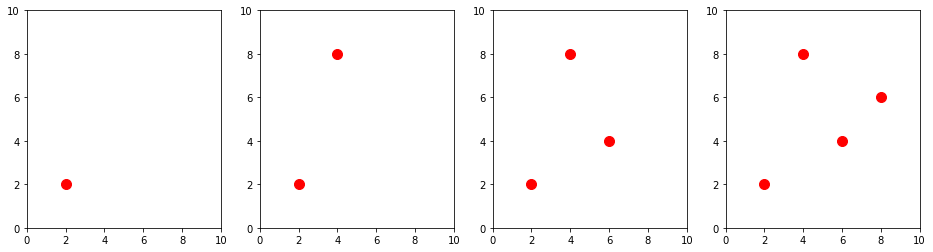

In [14]:
f,axs = plt.subplots(1, 4, figsize=(16,4))
X = np.array([[2,2],[4,8],[6,4],[8,6]])

for i in range(4):
    axs[i].plot(X[:i+1,0],X[:i+1,1],'r.',ms=20)
    axs[i].axis([0,10,0,10])
    
plt.show()

1. $$T(a +bx_1)$$

2. $$T((a*b)x_1 + (c/a)x_2)$$

3. $$T((x_1-a)^2 + (x_2 - b)^2 + c)$$

4. $$T(a + bx_1 + cx_2) \times T(d + bx_1 + cx_2)$$

1. Is a standard perceptron on one feature (so, two parameters). VC dimension is 2. Vertical lines in 2-D feature space, either side, left or right, taking either class value. Can shatter (a) and (b) but not (c) and (d). For example, in (c), if the labeling is +1, -1, +1.

2. Has three parameters, not independent. If $\alpha = a*b$ and $\beta = c/a$. there are only two independelty set-able parameters, so the VC dimension is probably 2. It's a linear classifier with no constant (bias) term; so, its decision boundary will be a line passing through the origin, and by changing a, it can predict either class on either side. Shattering (b) is possible. (c) cannot be shattered if (4,8) and (6,4) are negative but (2,2) is positive.

3. Has three parameters, _could_ shatter (a), (b), and (c). It's a circle centered at (a,b). Value increases with distance from (a,b), for c<0 we'll get class negative inside the circle, positive outside, with a radius determined by c. (d) it's not possible to shatter. So the VC dimension is **at least 3** but not 4. 

4. They are parallel lines with a controllable gap and slope. Since the decision is a product of two threshold functions, the region *outside* the parallel lines will be +1 (either $+1 \times +1$ OR $-1 \times -1$), and the region inside will be -1. The two lines *could* act as one and shatter (a) through (c). For (d), it can also be shattered since the *XOR* condition can be inside the parallel lines. So, the VC-dimension is $\geq 4$ but probably not 5
